# Boosting a decision stump

## Import module

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

## Load Data

In [2]:
# Load Data
loans = pd.read_csv("lending-club-data.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (19,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Extracting the target and the feature columns

We will now repeat some of the feature processing steps that we saw in the previous work:

First, we re-assign the target to have +1 as a safe (good) loan, and -1 as a risky (bad) loan.
Next, we select four categorical features:

1. grade of the loan
2. the length of the loan term
3. the home ownership status: own, mortgage, rent
4. number of years of employment.

In [3]:
# safe_loans =  1 => safe
# safe_loans = -1 => risky
loans['safe_loans'] = loans['bad_loans'].apply(lambda x: 1 if x==0 else -1)
loans = loans.drop('bad_loans',1)

In [4]:
# Subset of features
features = ['grade',              # grade of the loan
            'term',               # the term of the loan
            'home_ownership',     # home_ownership status: own, mortgage or rent
            'emp_length',         # number of years of employment
           ]
target = 'safe_loans'

# Extract the feature and target columns
loans = loans[features+[target]]

### Subsample dataset to make sure classes are balanced

In [5]:
safe_loans_raw = loans[loans[target] == +1]
risky_loans_raw = loans[loans[target] == -1]

# Since there are fewer risky loans than safe loans, find the ratio of the sizes
# and use that percentage to undersample the safe loans.
percentage = len(risky_loans_raw)/(len(safe_loans_raw))
risky_loans = risky_loans_raw
safe_loans = safe_loans_raw.sample(frac=percentage)
# Append the risky_loans with the downsampled version of safe_loans
loans_data = risky_loans.append(safe_loans)

### One-hot encoding

In [6]:
# one-hot encoding
print("Data types: \n", loans_data.dtypes)
categorical_variables = ['grade','term','home_ownership','emp_length']
loans_data = pd.get_dummies(loans_data,columns=categorical_variables)
train_data, test_data = train_test_split(loans_data,test_size=0.2)
features = list(loans_data.columns.values)
features.remove('safe_loans')

Data types: 
 grade             object
term              object
home_ownership    object
emp_length        object
safe_loans         int64
dtype: object


## Train-test data

Explore some train data:

In [7]:
train_data.head(5)

,safe_loans,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,term_ 36 months,term_ 60 months,...,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,emp_length_n/a
112992,-1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
52723,-1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
45951,-1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
82340,-1,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
87487,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


Explore som test data:

In [8]:
test_data.head(5)

,safe_loans,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,term_ 36 months,term_ 60 months,...,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,emp_length_n/a
75600,1,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
27163,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
102150,-1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
46932,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
63790,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Let's check these train & test data are balanced:

In [9]:
print("Number of Safe Loans in TRAIN DATA: ", (train_data['safe_loans']==1).sum())
print("Number of Bad Loans in TRAIN DATA: ", (train_data['safe_loans']==-1).sum())

Number of Safe Loans in TRAIN DATA:  18478
Number of Bad Loans in TRAIN DATA:  18562


In [10]:
print("Number of Safe Loans in TEST DATA: ", (test_data['safe_loans']==1).sum())
print("Number of Bad Loans in TEST DATA: ", (test_data['safe_loans']==-1).sum())

Number of Safe Loans in TEST DATA:  4672
Number of Bad Loans in TEST DATA:  4588


## Weighted decision trees

Weighted error definition
Consider a model with $N$ data points with:

* Predictions $\hat{y}_1 ... \hat{y}_n$
* Target $y_1 ... y_n$
* Data point weights $\alpha_1 ... \alpha_n$.

Then the weighted error is defined by: 

$$
\mathrm{E}(\mathbf{\alpha}, \mathbf{\hat{y}}) = \frac{\sum_{i=1}^{n} \alpha_i \times 1[y_i \neq \hat{y_i}]}{\sum_{i=1}^{n} \alpha_i}
$$ 

where $1[y_i \neq \hat{y_i}]$ is an indicator function that is set to $1$ if $y_i \neq \hat{y_i}$.

### Write a function to compute weight of mistakes

Write a function that calculates the weight of mistakes for making the "weighted-majority" predictions for a dataset. The function accepts two inputs:
    
* labels_in_node: Targets $y_1 ... y_n$
* data_weights: Data point weights $\alpha_1 ... \alpha_n$
    
We are interested in computing the (total) weight of mistakes, i.e. 

$$
\mathrm{WM}(\mathbf{\alpha}, \mathbf{\hat{y}}) = \sum_{i=1}^{n} \alpha_i \times 1[y_i \neq \hat{y_i}].
$$ 

This quantity is analogous to the number of mistakes, except that each mistake now carries different weight. It is related to the weighted error in the following way: 

$$
\mathrm{E}(\mathbf{\alpha}, \mathbf{\hat{y}}) = \frac{\mathrm{WM}(\mathbf{\alpha}, \mathbf{\hat{y}})}{\sum_{i=1}^{n} \alpha_i}
$$

The function **intermediate_node_weighted_mistakes** should first compute two weights:

* $\mathrm{WM}_{-1}$: weight of mistakes when all predictions are $\hat{y}_i = -1$ i.e $\mathrm{WM}(\mathbf{\alpha}, \mathbf{-1}$)
* $\mathrm{WM}_{+1}$: weight of mistakes when all predictions are $\hat{y}_i = +1$ i.e $\mbox{WM}(\mathbf{\alpha}, \mathbf{+1}$)

where $\mathbf{-1}$ and $\mathbf{+1}$ are vectors where all values are -1 and +1 respectively.

After computing $\mathrm{WM}_{-1}$ and $\mathrm{WM}_{+1}$, the function **intermediate_node_weighted_mistakes** should return the lower of the two weights of mistakes, along with the class associated with that weight.

In [11]:
def intermediate_node_num_mistakes(labels_in_node):
    # Corner case: If labels_in_node is empty, return 0
    if len(labels_in_node) == 0:
        return 0
    
    # Count the number of 1's (safe loans)
    num_of_positive = (labels_in_node == +1).sum()
    
    # Count the number of -1's (risky loans)
    num_of_negative = (labels_in_node == -1).sum()
                
    # Return the number of mistakes that the majority classifier makes.
    return num_of_negative if num_of_positive > num_of_negative else num_of_positive

In [12]:
def intermediate_node_weighted_mistakes(labels_in_node, data_weights):
    # Sum the weights of all entries with label +1
    total_weight_positive = sum(data_weights[labels_in_node == 1])
    
    # Weight of mistakes for predicting all -1's is equal to the sum above
    ### YOUR CODE HERE
    weighted_mistakes_all_negative = total_weight_positive
    
    # Sum the weights of all entries with label -1
    ### YOUR CODE HERE
    total_weight_negative = sum(data_weights[labels_in_node == -1])
    
    # Weight of mistakes for predicting all +1's is equal to the sum above
    ### YOUR CODE HERE
    weighted_mistakes_all_positive = total_weight_negative
    
    # Return the tuple (weight, class_label) representing the lower of the two weights
    #    class_label should be an integer of value +1 or -1.
    # If the two weights are identical, return (weighted_mistakes_all_positive,+1)
    ### YOUR CODE HERE
    if weighted_mistakes_all_positive <= weighted_mistakes_all_negative:        
        return (weighted_mistakes_all_positive, +1)
    else:        
        return (weighted_mistakes_all_negative, -1)

### Function to pick best feature to split on

We continue modifying our decision tree code from the earlier assignment to incorporate weighting of individual data points. The next step is to pick the best feature to split on.

The **best_splitting_feature function** is similar to the one from the earlier assignment with two minor modifications:

1. The function **best_splitting_feature** should now accept an extra parameter `data_weights` to take account of weights of data points.
2. Instead of computing the number of mistakes in the left and right side of the split, we compute the weight of mistakes for both sides, add up the two weights, and divide it by the total weight of the data.

In [13]:
def best_splitting_feature(data, features, target, data_weights):
    # data: pandas
    # features: list of stirngs
    # target: single string
    # data_weights: array
    
    data_weights = pd.Series(data_weights, index = data.index)
    
    # These variables will keep track of the best feature and the corresponding error
    best_feature = None
    best_error = float('+inf') 

    # Loop through each feature to consider splitting on that feature
    for feature in features:
        
        # The left split will have all data points where the feature value is 0
        # The right split will have all data points where the feature value is 1
        filter_list_0 = pd.Series(data[feature] == 0, dtype = bool)
        filter_list_1 = pd.Series(data[feature] == 1, dtype = bool)
        
        left_split = data[filter_list_0]
        right_split = data[filter_list_1]
        
        # Apply the same filtering to data_weights to create left_data_weights, right_data_weights
        ## YOUR CODE HERE
        
        left_data_weights = data_weights[filter_list_0]
        right_data_weights = data_weights[filter_list_1]
                    
        # DIFFERENT HERE
        # Calculate the weight of mistakes for left and right sides
        ## YOUR CODE HERE
        left_weighted_mistakes, left_class = intermediate_node_weighted_mistakes(left_split[target], left_data_weights)
        right_weighted_mistakes, right_class = intermediate_node_weighted_mistakes(right_split[target], right_data_weights)
        
        # DIFFERENT HERE
        # Compute weighted error by computing
        #  ( [weight of mistakes (left)] + [weight of mistakes (right)] ) / [total weight of all data points]
        ## YOUR CODE HERE
        error = (left_weighted_mistakes + right_weighted_mistakes)/(sum(left_data_weights) + sum(right_data_weights))
        
        # If this is the best error we have found so far, store the feature and the error
        if error < best_error:
            best_feature = feature
            best_error = error
    
    # Return the best feature we found
    return best_feature

Relationship between weighted error and weight of mistakes
By definition, the weighted error is the weight of mistakes divided by the weight of all data points, so 

$$
\mathrm{E}(\mathbf{\alpha}, \mathbf{\hat{y}}) = \frac{\sum_{i=1}^{n} \alpha_i \times 1[y_i \neq \hat{y_i}]}{\sum_{i=1}^{n} \alpha_i} = \frac{\mathrm{WM}(\mathbf{\alpha}, \mathbf{\hat{y}})}{\sum_{i=1}^{n} \alpha_i}.
$$

In the code above, we obtain $\mathrm{E}(\mathbf{\alpha}, \mathbf{\hat{y}})$ from the two weights of mistakes from both sides, $\mathrm{WM}(\mathbf{\alpha}_{\mathrm{left}}, \mathbf{\hat{y}}_{\mathrm{left}})$ and $\mathrm{WM}(\mathbf{\alpha}_{\mathrm{right}}, \mathbf{\hat{y}}_{\mathrm{right}})$. 

First, notice that the overall weight of mistakes $\mathrm{WM}(\mathbf{\alpha}, \mathbf{\hat{y}})$ can be broken into two weights of mistakes over either side of the split: 

$$ \mathrm{WM}(\mathbf{\alpha}, \mathbf{\hat{y}}) = \sum_{i=1}^{n} \alpha_i \times 1[y_i \neq \hat{yi}] = \sum_{\mathrm{left}} \alpha_i \times 1[y_i \neq \hat{y_i}]
\sum_{\mathrm{right}} \alpha_i \times 1[y_i \neq \hat{yi}]\ = \mathrm{WM}(\mathbf{\alpha}\;{\mathrm{left}}, \mathbf{\hat{y}}{\mathrm{left}}) + \mathrm{WM}(\mathbf{\alpha}\;{\mathrm{right}}, \mathbf{\hat{y}}{\mathrm{right}}) 
$$

We then divide through by the total weight of all data points to obtain $\mathrm{E}(\mathbf{\alpha}, \mathbf{\hat{y}})$:

$$ \mathrm{E}(\mathbf{\alpha}, \mathbf{\hat{y}}) = \frac{\mathrm{WM}(\mathbf{\alpha}\;{\mathrm{left}}, \mathbf{\hat{y}}{\mathrm{left}}) + \mathrm{WM}(\mathbf{\alpha}\;{\mathrm{right}}, \mathbf{\hat{y}}{\mathrm{right}})}{\sum_{i=1}^{n} \alpha_i} $$

### Building the tree

With the above functions implemented correctly, we are now ready to build our decision tree. Recall from the previous assignments that each node in the decision tree is represented as a dictionary which contains the following keys:

{
``` 
   'is_leaf'            : True/False.
   'prediction'         : Prediction at the leaf node.
   'left'               : (dictionary corresponding to the left tree).
   'right'              : (dictionary corresponding to the right tree).
   'features_remaining' : List of features that are posible splits.
```
}

In [14]:
def create_leaf(target_values, data_weights):
    
    # Create a leaf node
    leaf = {'splitting_feature' : None,
            'is_leaf': True}
    
    # Computed weight of mistakes.
    weighted_error, best_class = intermediate_node_weighted_mistakes(target_values, data_weights)
    # Store the predicted class (1 or -1) in leaf['prediction']
    leaf['prediction'] = best_class
        
    # Return the leaf node        
    return leaf

In [15]:
def weighted_decision_tree_create(data, features, target, data_weights, current_depth = 1, max_depth = 10):
    data_weights = pd.Series(data_weights, index = data.index)
    remaining_features = features[:] # Make a copy of the features.
    target_values = data[target]
    print("--------------------------------------------------------------------")
    print("Subtree, depth = %s (%s data points)." % (current_depth, len(target_values)))
    
    # Stopping condition 1. Error is 0.
    if intermediate_node_weighted_mistakes(target_values, data_weights)[0] <= 1e-15:
        print("Stopping condition 1 reached." )               
        return create_leaf(target_values, data_weights)
    
    # Stopping condition 2. No more features.
    if remaining_features == []:
        print("Stopping condition 2 reached.")                
        return create_leaf(target_values, data_weights)    
    
    # Additional stopping condition (limit tree depth)
    if current_depth > max_depth:
        print("Reached maximum depth. Stopping for now.")
        return create_leaf(target_values, data_weights)
    
    # If all the datapoints are the same, splitting_feature will be None. Create a leaf
    splitting_feature = best_splitting_feature(data, features, target, data_weights)
    remaining_features.remove(splitting_feature)
        
    left_split = data[data[splitting_feature] == 0]
    right_split = data[data[splitting_feature] == 1]
    
    left_data_weights = data_weights[data[splitting_feature] == 0]
    right_data_weights = data_weights[data[splitting_feature] == 1]
    
    print("Split on feature %s. (%s, %s)" % (\
              splitting_feature, len(left_split), len(right_split)))
    
    # Create a leaf node if the split is "perfect"
    if len(left_split) == len(data):
        print("Creating leaf node.")
        return create_leaf(left_split[target], data_weights)
    if len(right_split) == len(data):
        print("Creating leaf node.")
        return create_leaf(right_split[target], data_weights)
    
    # Repeat (recurse) on left and right subtrees
    left_tree = weighted_decision_tree_create(
        left_split, remaining_features, target, left_data_weights, current_depth + 1, max_depth)
    right_tree = weighted_decision_tree_create(
        right_split, remaining_features, target, right_data_weights, current_depth + 1, max_depth)
    
    return {'is_leaf'          : False, 
            'prediction'       : None,
            'splitting_feature': splitting_feature,
            'left'             : left_tree, 
            'right'            : right_tree}

Here is a recursive function to count the nodes in your tree:Here is a recursive function to count the nodes in your tree:

In [16]:
def count_nodes(tree):
    if tree['is_leaf']:
        return 1
    return 1 + count_nodes(tree['left']) + count_nodes(tree['right'])

### Making predictions with a weighted decision tree

In [17]:
def classify(tree, x, annotate = False):   
    # If the node is a leaf node.
    if tree['is_leaf']:
        if annotate: 
            print("At leaf, predicting %s" % tree['prediction'])
        return tree['prediction'] 
    else:
        # Split on feature.
        split_feature_value = x[tree['splitting_feature']]
        if annotate: 
            print("Split on %s = %s" % (tree['splitting_feature'], split_feature_value))
        if split_feature_value == 0:
            return classify(tree['left'], x, annotate)
        else:
            return classify(tree['right'], x, annotate)

### Evaluating the tree

Now, we will write a function to evaluate a decision tree by computing the classification error of the tree on the given dataset.
Again, recall that the classification error is defined as follows: 

$$
\mbox{classification error} = \frac{\mbox{# mistakes}}{\mbox{# all data points}}
$$

The function called evaluate_classification_error takes in as input:

1. tree
2. data

The function does not change because of adding data point weights.

In [18]:
def evaluate_classification_error(tree, data, target):
    # Apply the classify(tree, x) to each row in your data
    prediction = data.apply(lambda x: classify(tree, x), axis=1)    
    # Once you've made the predictions, calculate the classification error and return it
    ## YOUR CODE HERE
    num_of_mistakes = (prediction != data[target]).sum()/float(len(data))
    return num_of_mistakes

## Example: Training a weighted decision tree

To build intuition on how weighted data points affect the tree being built, consider the following

Suppose we only care about making good predictions for the first 10 and last 10 items in train_data, we assign weights:

* 1 to the last 10 items
* 1 to the first 10 item
* and 0 to the rest.

Let us fit a weighted decision tree with `max_depth = 2`.

In [19]:
example_data_weights = [1.] * 10 + [0.]*(len(train_data) - 20) + [1.] * 10
small_data_decision_tree_subset_20 = weighted_decision_tree_create(train_data, features, target,
                         example_data_weights, max_depth=2)

--------------------------------------------------------------------
Subtree, depth = 1 (37040 data points).
Split on feature grade_B. (26731, 10309)
--------------------------------------------------------------------
Subtree, depth = 2 (26731 data points).
Split on feature emp_length_5 years. (24719, 2012)
--------------------------------------------------------------------
Subtree, depth = 3 (24719 data points).
Reached maximum depth. Stopping for now.
--------------------------------------------------------------------
Subtree, depth = 3 (2012 data points).
Stopping condition 1 reached.
--------------------------------------------------------------------
Subtree, depth = 2 (10309 data points).
Split on feature emp_length_4 years. (9627, 682)
--------------------------------------------------------------------
Subtree, depth = 3 (9627 data points).
Reached maximum depth. Stopping for now.
--------------------------------------------------------------------
Subtree, depth = 3 (682 da

Now, we will compute the classification error on the subset_20, i.e. the subset of data points whose weight is 1 (namely the first and last 10 data points).

In [20]:
subset_20 = train_data.head(10).append(train_data.tail(10))

In [21]:
evaluate_classification_error(small_data_decision_tree_subset_20, subset_20, target)

0.10000000000000001

Now, let us compare the classification error of the model small_data_decision_tree_subset_20 on the entire test set `train_data`:

In [22]:
evaluate_classification_error(small_data_decision_tree_subset_20, train_data, target)

0.46158207343412527

The model `small_data_decision_tree_subset_20` performs a lot better on `subset_20` than on train_data.

* The points with higher weights are the ones that are more important during the training process of the weighted decision tree.
* The points with zero weights are basically ignored during training.

## Implementing Adaboost (on decision stumps)

Now that we have a weighted decision tree working, it takes only a bit of work to implement Adaboost. For the sake of simplicity, let us stick with decision tree stumps by training trees with max_depth=1.
Recall from the lecture the procedure for Adaboost:

1. Start with unweighted data with $\alpha_j = 1$
2. For t = 1,...T:

    * Learn $f_t(x)$ with data weights $\alpha_j$
    * Compute coefficient $\hat{w}_t$: $$\hat{w}_t = \frac{1}{2}\ln{\left(\frac{1- \mbox{E}(\mathbf{\alpha}, \mathbf{\hat{y}})}{\mbox{E}(\mathbf{\alpha}, \mathbf{\hat{y}})}\right)}$$
    * Re-compute weights $\alpha_j$: $$\alpha_j \gets \begin{cases}
 \alpha_j \exp{(-\hat{w}_t)} &amp; \text{ if }f_t(x_j) = y_j\\
 \alpha_j \exp{(\hat{w}_t)} &amp; \text{ if }f_t(x_j) \neq y_j
 \end{cases}$$
     *Normalize weights $\alpha_j$: $$\alpha_j \gets \frac{\alpha_j}{\sum_{i=1}^{N}{\alpha_i}} $$

In [23]:
from math import log
from math import exp

def adaboost_with_tree_stumps(data, features, target, num_tree_stumps):
    # start with unweighted data
    alpha = pd.Series([1.]*len(data),index=data.index)
    weights = []
    tree_stumps = []
    target_values = data[target]
    
    for t in range(num_tree_stumps):
        print('=====================================================')
        print('Adaboost Iteration %2d' % t)
        print('=====================================================')        
        # Learn a weighted decision tree stump. Use max_depth=1
        tree_stump = weighted_decision_tree_create(data, features, target, data_weights=alpha, max_depth=1)
        tree_stumps.append(tree_stump)
        
        # Make predictions
        predictions = data.apply(lambda x: classify(tree_stump, x), axis=1)
        
        # Produce a Boolean array indicating whether
        # each data point was correctly classified
        is_correct = predictions == target_values
        is_wrong   = predictions != target_values
        
        # Compute weighted error
        # YOUR CODE HERE
        weighted_error = sum(alpha[is_wrong])/sum(alpha)
        
        # Compute model coefficient using weighted error
        # YOUR CODE HERE
        weight = 1./2. * log((1 - weighted_error)/weighted_error)
        weights.append(weight)
        
        # Adjust weights on data point
        adjustment = is_correct.apply(lambda is_correct : exp(-weight) if is_correct else exp(weight))
        
        # Scale alpha by multiplying by adjustment 
        # Then normalize data points weights
        ## YOUR CODE HERE 
        alpha = (alpha * adjustment)/float(sum(alpha))

    return weights, tree_stumps

### Training a boosted ensemble of 10 stumps

Let us train an ensemble of 10 decision tree stumps with Adaboost. We run the adaboost_with_tree_stumps function with the following parameters:

* train_data
* features
* target
* num_tree_stumps = 10

In [24]:
stump_weights, tree_stumps = adaboost_with_tree_stumps(train_data, features, 
                                target, num_tree_stumps=10)

Adaboost Iteration  0
--------------------------------------------------------------------
Subtree, depth = 1 (37040 data points).
Split on feature term_ 36 months. (9256, 27784)
--------------------------------------------------------------------
Subtree, depth = 2 (9256 data points).
Reached maximum depth. Stopping for now.
--------------------------------------------------------------------
Subtree, depth = 2 (27784 data points).
Reached maximum depth. Stopping for now.
Adaboost Iteration  1
--------------------------------------------------------------------
Subtree, depth = 1 (37040 data points).
Split on feature grade_A. (32077, 4963)
--------------------------------------------------------------------
Subtree, depth = 2 (32077 data points).
Reached maximum depth. Stopping for now.
--------------------------------------------------------------------
Subtree, depth = 2 (4963 data points).
Reached maximum depth. Stopping for now.
Adaboost Iteration  2
------------------------------

## Making predictions

Recall from the lecture that in order to make predictions, we use the following formula: 

$$
\hat{y} = sign\left(\sum_{t=1}^T \hat{w}_t f_t(x)\right)
$$

We need to do the following things:

* Compute the predictions $f_t(x)$ using the $t$-th decision tree
* Compute $\hat{w}_t f_t(x)$ by multiplying the stump_weights with the predictions $f_t(x)$ from the decision trees
* Sum the weighted predictions over each stump in the ensemble.

In [25]:
def predict_adaboost(stump_weights, tree_stumps, data):
    scores = pd.Series([0.]*len(data), index=data.index)
    
    for i, tree_stump in enumerate(tree_stumps):
        predictions = data.apply(lambda x: classify(tree_stump, x), axis = 1)
        
        # Accumulate predictions on scores array
        # YOUR CODE HERE
        scores += (stump_weights[i] * predictions)
        
    return scores.apply(lambda score : +1 if score > 0 else -1)

Accuracy of 10-component ensemble:

In [26]:
predictions = predict_adaboost(stump_weights, tree_stumps, test_data)
(test_data['safe_loans'] == predictions).sum()/len(test_data)

0.61684665226781854

## Performance plots

How does accuracy change with adding stumps to the ensemble?
We will now train an ensemble with:

* train_data
* features
* target
* num_tree_stumps = 30
Once we are done with this, we will then do the following:

* Compute the classification error at the end of each iteration.
* Plot a curve of classification error vs iteration.

First, lets train the model.

In [27]:
stump_weights, tree_stumps = adaboost_with_tree_stumps(train_data, 
                                 features, target, num_tree_stumps=30)

Adaboost Iteration  0
--------------------------------------------------------------------
Subtree, depth = 1 (37040 data points).
Split on feature term_ 36 months. (9256, 27784)
--------------------------------------------------------------------
Subtree, depth = 2 (9256 data points).
Reached maximum depth. Stopping for now.
--------------------------------------------------------------------
Subtree, depth = 2 (27784 data points).
Reached maximum depth. Stopping for now.
Adaboost Iteration  1
--------------------------------------------------------------------
Subtree, depth = 1 (37040 data points).
Split on feature grade_A. (32077, 4963)
--------------------------------------------------------------------
Subtree, depth = 2 (32077 data points).
Reached maximum depth. Stopping for now.
--------------------------------------------------------------------
Subtree, depth = 2 (4963 data points).
Reached maximum depth. Stopping for now.
Adaboost Iteration  2
------------------------------

Split on feature grade_A. (32077, 4963)
--------------------------------------------------------------------
Subtree, depth = 2 (32077 data points).
Reached maximum depth. Stopping for now.
--------------------------------------------------------------------
Subtree, depth = 2 (4963 data points).
Reached maximum depth. Stopping for now.
Adaboost Iteration 15
--------------------------------------------------------------------
Subtree, depth = 1 (37040 data points).
Split on feature emp_length_n/a. (35580, 1460)
--------------------------------------------------------------------
Subtree, depth = 2 (35580 data points).
Reached maximum depth. Stopping for now.
--------------------------------------------------------------------
Subtree, depth = 2 (1460 data points).
Reached maximum depth. Stopping for now.
Adaboost Iteration 16
--------------------------------------------------------------------
Subtree, depth = 1 (37040 data points).
Split on feature emp_length_2 years. (33472, 3568)
--

Adaboost Iteration 29
--------------------------------------------------------------------
Subtree, depth = 1 (37040 data points).
Split on feature emp_length_3 years. (33890, 3150)
--------------------------------------------------------------------
Subtree, depth = 2 (33890 data points).
Reached maximum depth. Stopping for now.
--------------------------------------------------------------------
Subtree, depth = 2 (3150 data points).
Reached maximum depth. Stopping for now.


### Computing training error at the end of each iteration

Now, we will compute the classification error on the **train_data** and see how it is reduced as trees are added.

In [28]:
error_all = []
for n in range(1, 31):
    predictions = predict_adaboost(stump_weights[:n], tree_stumps[:n], train_data)
    error = 1.0 - (train_data[target] == predictions).sum()/len(train_data)
    error_all.append(error)
    print("Iteration %s, training error = %s" % (n, error_all[n-1]))

Iteration 1, training error = 0.424568034557
Iteration 2, training error = 0.432910367171
Iteration 3, training error = 0.400917926566
Iteration 4, training error = 0.386096112311
Iteration 5, training error = 0.38752699784
Iteration 6, training error = 0.38755399568
Iteration 7, training error = 0.385205183585
Iteration 8, training error = 0.385205183585
Iteration 9, training error = 0.383666306695
Iteration 10, training error = 0.385205183585
Iteration 11, training error = 0.383666306695
Iteration 12, training error = 0.382154427646
Iteration 13, training error = 0.382154427646
Iteration 14, training error = 0.382154427646
Iteration 15, training error = 0.381425485961
Iteration 16, training error = 0.381425485961
Iteration 17, training error = 0.381425485961
Iteration 18, training error = 0.381155507559
Iteration 19, training error = 0.381425485961
Iteration 20, training error = 0.381587473002
Iteration 21, training error = 0.381587473002
Iteration 22, training error = 0.381533477322

### Visualizing training error vs number of iterations

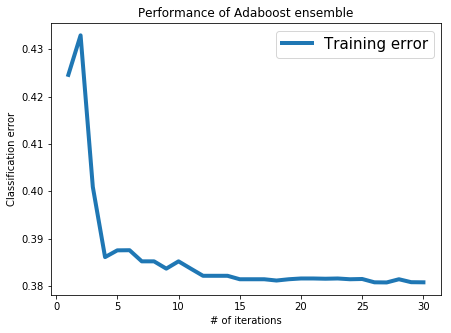

In [29]:
# Visualizing training error vs number of iterations
plt.rcParams['figure.figsize'] = 7, 5
plt.plot(range(1,31), error_all, '-', linewidth=4.0, label='Training error')
plt.title('Performance of Adaboost ensemble')
plt.xlabel('# of iterations')
plt.ylabel('Classification error')
plt.legend(loc='best', prop={'size':15})
plt.rcParams.update({'font.size': 16})

### Evaluation on the test data

Performing well on the training data is cheating, so lets make sure it works on the `test_data` as well. Here, we will compute the classification error on the `test_data` at the end of each iteration.

In [30]:
test_error_all = []
for n in range(1, 31):
    predictions = predict_adaboost(stump_weights[:n], tree_stumps[:n], test_data)
    error = 1.0 - (test_data[target] == predictions).sum()/len(test_data)
    test_error_all.append(error)
    print("Iteration %s, test error = %s" % (n, test_error_all[n-1]))

Iteration 1, test error = 0.424838012959
Iteration 2, test error = 0.432505399568
Iteration 3, test error = 0.398812095032
Iteration 4, test error = 0.385421166307
Iteration 5, test error = 0.386393088553
Iteration 6, test error = 0.386393088553
Iteration 7, test error = 0.383369330454
Iteration 8, test error = 0.383369330454
Iteration 9, test error = 0.382397408207
Iteration 10, test error = 0.383153347732
Iteration 11, test error = 0.382397408207
Iteration 12, test error = 0.382505399568
Iteration 13, test error = 0.382505399568
Iteration 14, test error = 0.382505399568
Iteration 15, test error = 0.381425485961
Iteration 16, test error = 0.381425485961
Iteration 17, test error = 0.381425485961
Iteration 18, test error = 0.378833693305
Iteration 19, test error = 0.381425485961
Iteration 20, test error = 0.381425485961
Iteration 21, test error = 0.381425485961
Iteration 22, test error = 0.381425485961
Iteration 23, test error = 0.381425485961
Iteration 24, test error = 0.381425485961
I

### Visualize both the training and test errors

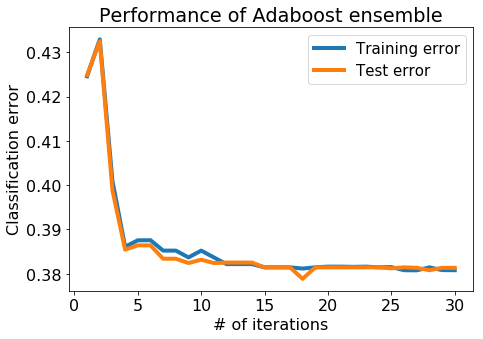

In [31]:
plt.rcParams['figure.figsize'] = 7, 5
plt.plot(range(1,31), error_all, '-', linewidth=4.0, label='Training error')
plt.plot(range(1,31), test_error_all, '-', linewidth=4.0, label='Test error')

plt.title('Performance of Adaboost ensemble')
plt.xlabel('# of iterations')
plt.ylabel('Classification error')
plt.rcParams.update({'font.size': 16})
plt.legend(loc='best', prop={'size':15})
plt.tight_layout()